## Diabetic Detection With 20 Perecent Noisy Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('pima_diabetes_20_per.csv')
array = data.values
X_Orginal = array[:,0:8]
Y_Orginal = array[:,8]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,3.971715,147.056372,70.956019,36.397967,2.99791,36.632056,5.001434,1
1,1,85.000000,66.000000,29.000000,0.000000,26.60000,0.351000,31.000000,0
2,8,183.000000,64.000000,0.000000,0.000000,23.30000,0.672000,32.000000,1
3,1,89.000000,66.000000,23.000000,94.000000,28.10000,0.167000,21.000000,0
4,0,137.000000,40.000000,35.000000,168.000000,43.10000,2.288000,33.000000,1


In [3]:
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.231127
Age                         0.142145
BloodPressure               0.131187
Insulin                     0.124885
BMI                         0.069543
SkinThickness               0.047811
DiabetesPedigreeFunction    0.037040
Pregnancies                 0.003741
Name: Outcome, dtype: float64

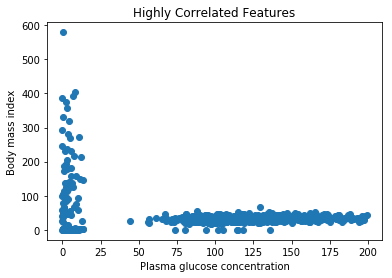

In [4]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

In [5]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

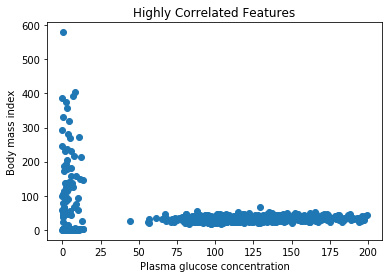

In [6]:
visualise(data)

In [7]:
X = data[['Glucose','BMI']].values
y = data[['Outcome']].values

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [10]:
print(X[0:10,:])

[[-1.84675135 -0.75331775]
 [-0.30144577 -0.28965551]
 [ 1.56753056 -0.3544839 ]
 [-0.22516102 -0.26018806]
 [ 0.69025596  0.03448641]
 [ 0.28976103 -0.30930048]
 [-0.43494408 -0.20321767]
 [ 0.27068984 -0.11874432]
 [ 1.83452718 -0.21304015]
 [-1.71560738 -0.8105092 ]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[95  2]
 [39 16]]


In [14]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

#F1 Score Computation

F1 = 2 * (precision * recall) / (precision + recall)

print("F1 Score %f" %(F1))

Precision: 0.979381 Recall 0.708955
F1 Score 0.822511


In [15]:
# Accurecy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_Orginal, Y_Orginal, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.723 (0.069)


In [16]:
# Aera Under AUC

scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_Orginal, Y_Orginal, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.770 (0.073)


In [17]:
# Classification Report

from sklearn.metrics import classification_report

model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.71      0.98      0.82        97
          1       0.89      0.29      0.44        55

avg / total       0.77      0.73      0.68       152



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#Log Loss Function

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_Orginal, Y_Orginal, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.545 (0.067)
